<a href="https://colab.research.google.com/github/fahmizainal17/Machine-Learning-Project-to-predict-salary-/blob/main/Model_Building_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Prerequisites, Libraries and Packages

Import all basic libraries


In [105]:
import numpy as np                          #for linear algebra
import pandas as pd                         #for data manipulation
import matplotlib.pyplot as plt             #for visualization

import seaborn as sns                       #for visualization

pd.set_option('display.max_columns',None)   #to display all columns in a data set

import warnings                             #to avoid warning flash
warnings.filterwarnings('ignore')

#2. Data Preparation

##2.1 Import the data


In [106]:
df = pd.read_csv("/content/Uncleaned_Data.csv")
df.head()

,age,race,gender,employment,education,married,person_living_in_house,salary,house_type,house_value,vehicle,house_rental_fee,house_loan_pmt,transport_use,transport_spending,public_transport_spending,house_utility,food_spending,kids_spending,personal_loan,education_loan,other_loan,investment
0,30,Kree,M,Employed,High School,Yes,3,1K to 2K,Rental house - flat,Below 100K,Local brand car,450.0,0.0,Own transport,250.0,0.0,120.0,300.0,160.0,0.0,0.0,200.0,0.0
1,43,Sapiens,M,Self-employed,Bachelor's Degree,Yes,3,5K to 6K,Own house - condominiums,300K to 400K,Asia brand car,0.0,950.0,Own transport,700.0,0.0,350.0,1000.0,500.0,300.0,0.0,0.0,0.0
2,28,Skrull,F,Employed,Bachelor's Degree,Yes,5,2K to 3K,Parent's house,NaN,Local brand car,0.0,0.0,Own transport,600.0,0.0,300.0,600.0,100.0,0.0,0.0,0.0,0.0
3,57,Kree,F,Self-employed,High School,Yes,4,1K to 2K,Own house - kampung / wooden house,Below 100K,Motorcycle,0.0,0.0,Own transport,100.0,0.0,200.0,800.0,450.0,0.0,0.0,0.0,0.0
4,51,Skrull,F,Unemployed,High School,Yes,5,3K to 4K,Own house - flat,Below 100K,Asia brand car,0.0,0.0,NaN,0.0,0.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0


##2.2 Brief explation of columns

| Header                   | Description                                       |
|--------------------------|---------------------------------------------------|
| age                      | Respondent’s age                                 |
| race                     | Respondent’s race                                |
| gender                   | Respondent’s gender                              |
| employment               | Respondent’s employment type                     |
| education                | Respondent’s education level                     |
| married                  | Respondent’s marital status                      |
| person_living_in_house   | Number of persons living in respondent’s house   |
| salary                   | Respondent’s monthly salary                      |
| house_type               | Type of house (with ownership status)            |
| house_value              | Current house value                              |
| vehicle                  | Type of vehicle owned by respondent              |
| house_rental_fee         | Monthly rental fee                                |
| house_loan_pmt           | Monthly installment for house loan               |
| transport_use            | Type of transportation used by respondent        |
| transport_spending       | Average monthly spending on own transportation  |
| public_transport_spending | Average monthly spending on public transportation |
| house_utility            | Average monthly spending on house utilities      |
| food_spending            | Average monthly spending on food                 |
| kids_spending            | Average monthly spending on kids’ necessities    |
| personal_loan            | Monthly installment for personal loan             |
| education_loan           | Monthly installment for education loan            |
| other_loan               | Monthly installment for other loans              |
| investment               | Average monthly spending on investment            |

In [107]:
print("Dataset")
print(df.shape)
print("Number of rows: "+str(df.shape[0]))
print("Number of columns: "+str(df.shape[1]))

Dataset
(2226, 23)
Number of rows: 2226
Number of columns: 23


#3. Exploratory Data Analysis

3.01 Check descriptive statistics

In [108]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,2226.0,NaN,NaN,NaN,47.836478,14.987553,24.0,34.0,49.0,60.0,88.0
race,2226,4,Kree,992,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,2226,2,F,1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment,2224,6,Employed,1035,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,2223,4,High School,1396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
married,2223,3,Yes,1612,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_living_in_house,2221,10,4,417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
salary,2168,10,Less than 1K,755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
house_type,2217,13,Parent's house,646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
house_value,1269,10,Below 100K,660,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2226 non-null   int64  
 1   race                       2226 non-null   object 
 2   gender                     2226 non-null   object 
 3   employment                 2224 non-null   object 
 4   education                  2223 non-null   object 
 5   married                    2223 non-null   object 
 6   person_living_in_house     2221 non-null   object 
 7   salary                     2168 non-null   object 
 8   house_type                 2217 non-null   object 
 9   house_value                1269 non-null   object 
 10  vehicle                    2197 non-null   object 
 11  house_rental_fee           2073 non-null   float64
 12  house_loan_pmt             2139 non-null   float64
 13  transport_use              1701 non-null   objec

## 3.1 Data Cleaning

3.11 Check missing values


In [110]:
missing_values = df.isnull().sum().sort_values(ascending=False)
percentage_missing = (missing_values / len(df)) * 100

missing_info = pd.concat([missing_values, percentage_missing], axis=1)
missing_info.columns = ['Missing Values', 'Percentage Missing']

print(missing_info)

                           Missing Values  Percentage Missing
house_value                           957           42.991914
transport_use                         525           23.584906
public_transport_spending             231           10.377358
house_rental_fee                      153            6.873315
investment                            152            6.828392
education_loan                        133            5.974843
personal_loan                         132            5.929919
other_loan                            114            5.121294
house_loan_pmt                         87            3.908356
salary                                 58            2.605571
transport_spending                     32            1.437556
vehicle                                29            1.302785
kids_spending                          27            1.212938
house_utility                          12            0.539084
food_spending                          11            0.494160
house_ty

As we can see, most of our columns contain misssing values


**Approach to Missing Values**

FootNote
- mean
- median
- mode
- Previous row
- Fully Drop
---
Ways
- mean
- median
- mode
- Fully Drop
---
KDEplot, Histogram
- All Features
- Do not include target

3.12 Separate for numerical features and non-numerical features

In [111]:
df.columns

Index(['age', 'race', 'gender', 'employment', 'education', 'married',
       'person_living_in_house', 'salary', 'house_type', 'house_value',
       'vehicle', 'house_rental_fee', 'house_loan_pmt', 'transport_use',
       'transport_spending', 'public_transport_spending', 'house_utility',
       'food_spending', 'kids_spending', 'personal_loan', 'education_loan',
       'other_loan', 'investment'],
      dtype='object')

In [112]:
num = df.select_dtypes(include=['int64', 'float64']).columns  # numerical columns
cat = df.select_dtypes(include=['object']).columns  # non-numerical (categorical) columns


In [113]:
num

Index(['age', 'house_rental_fee', 'house_loan_pmt', 'transport_spending',
       'public_transport_spending', 'house_utility', 'food_spending',
       'kids_spending', 'personal_loan', 'education_loan', 'other_loan',
       'investment'],
      dtype='object')

3.13 Check the distribution of each features to decide the approach for missing values imputation. **Numerical Features**



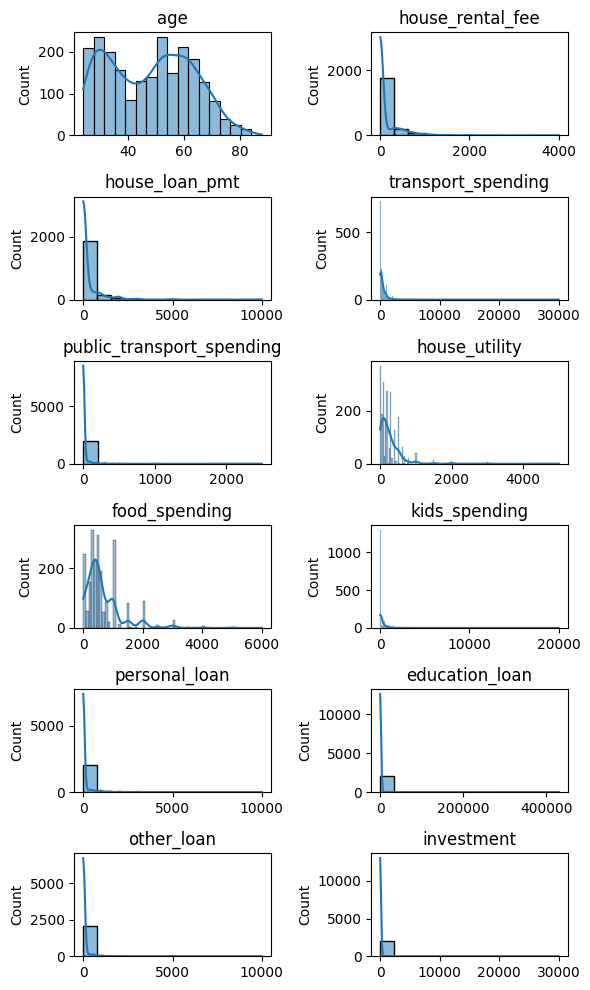

In [114]:
# Define the number of columns for subplots
num_columns = 2
num_rows = int(np.ceil(len(num) / num_columns))

# Create a figure and axis for subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(6, 10))

# Flatten the 2D axes array to simplify indexing
axes = axes.ravel()

# Loop through the features and create histograms
for i, feature in enumerate(num):
    ax = axes[i]
    sns.histplot(data=df, x=feature, ax=ax, kde=True)
    ax.set_title(f'{feature}')
    ax.set_xlabel('')

# Remove any empty subplots
for i in range(len(num), num_rows * num_columns):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

We have to choose either median or mean for numerical feature but we choose median here because most of our features are right-skewed, so the suitable approach is **median**.

3.14 Check the distribution of each features to decide the approach for missing values imputation. **Categorical Features - Non-numerical**


In [115]:
cat

Index(['race', 'gender', 'employment', 'education', 'married',
       'person_living_in_house', 'salary', 'house_type', 'house_value',
       'vehicle', 'transport_use'],
      dtype='object')

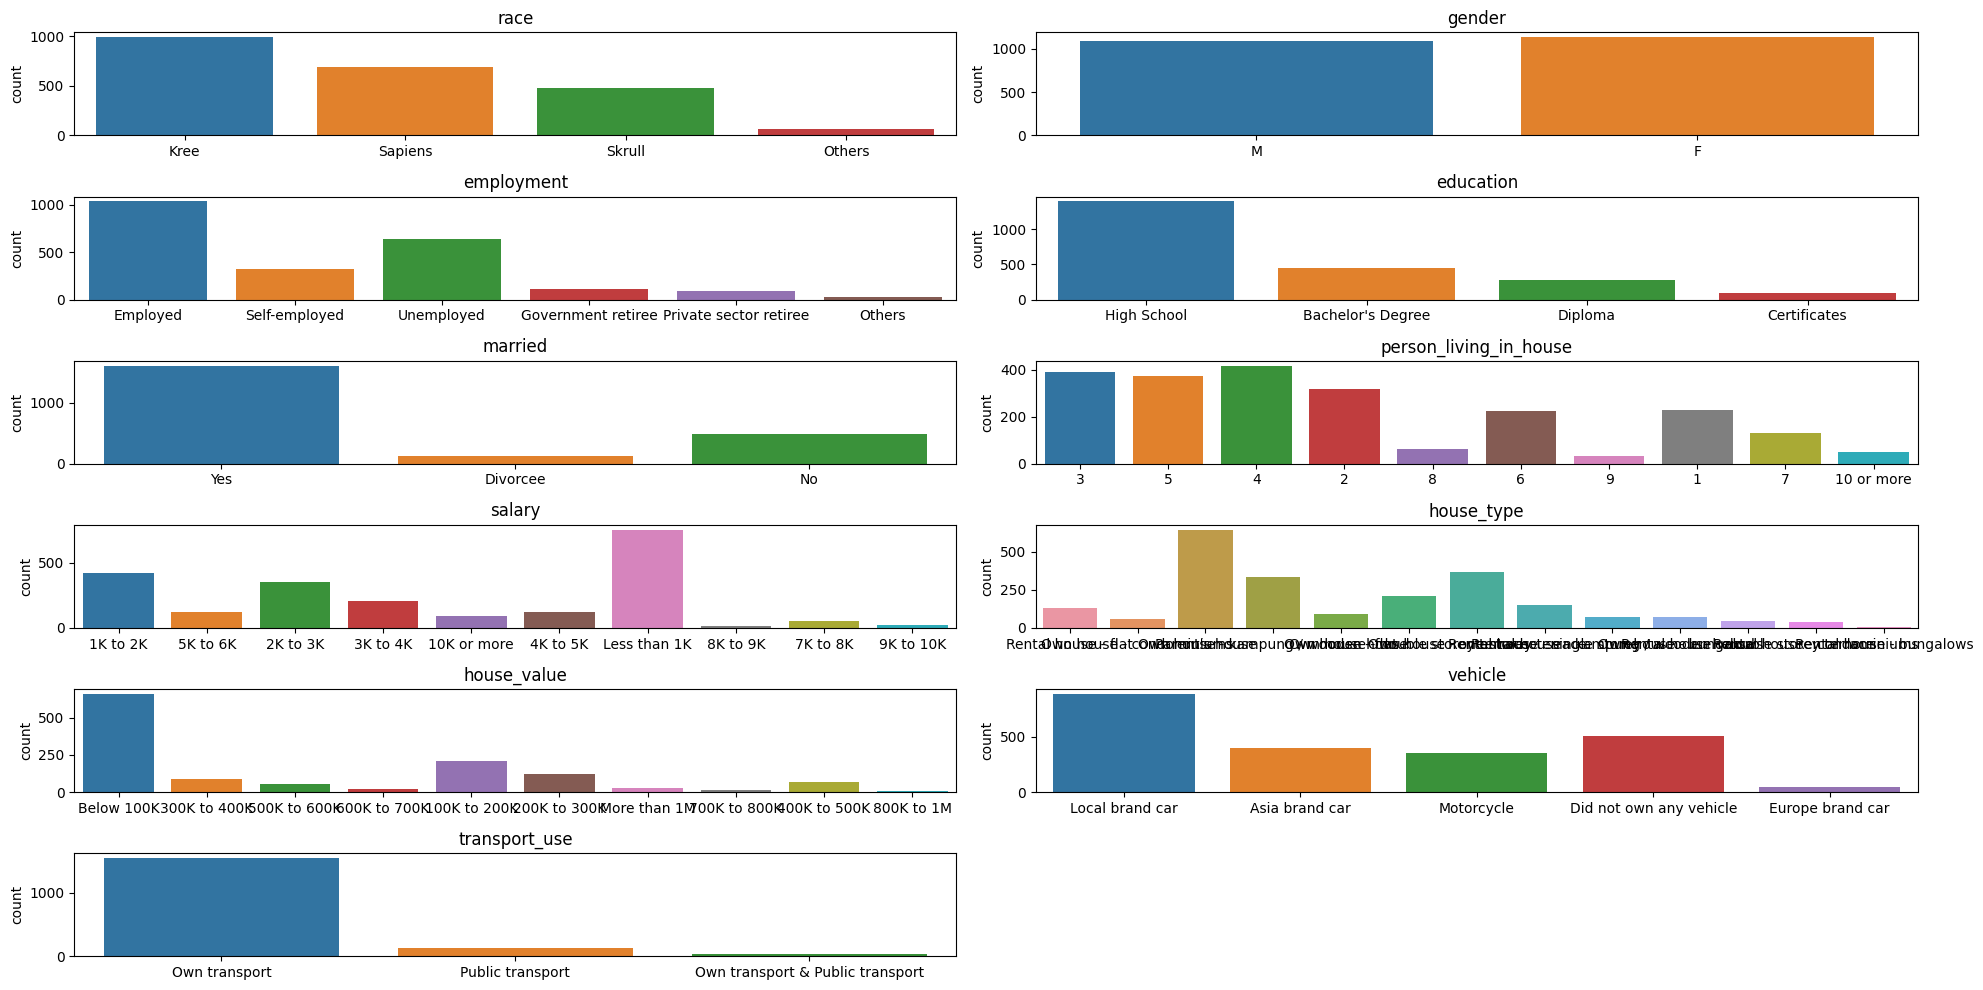

In [116]:
# Define the number of columns for subplots
num_columns = 2
num_rows = int(np.ceil(len(cat) / num_columns))

# Create a figure and axis for subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 10))

# Flatten the 2D axes array to simplify indexing
axes = axes.ravel()

# Loop through the features and create histograms
for i, feature in enumerate(cat):
    ax = axes[i]
    sns.countplot(data=df, x=feature, ax=ax)
    ax.set_title(f'{feature}')
    ax.set_xlabel('')

# Remove any empty subplots
for i in range(len(cat), num_rows * num_columns):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

The suitable approach to impute missing values for non-numerical are `mode`
we will remove `house_value` column as it approach 50% missing values

Approach for missing values imputation

1. Median - All missing numerical values
2. Mode all missing non-numerical values except `house_value` column
3.Drop Whole column - `house_value` by drop col

3.15 Create Backup Data for impute note in case we want to go back later for correction.

In [117]:
#create a backup first before running the code to retrieve back later the original one
df_backup = df.copy()


In [118]:
df = df_backup.copy()

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226 entries, 0 to 2225
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2226 non-null   int64  
 1   race                       2226 non-null   object 
 2   gender                     2226 non-null   object 
 3   employment                 2224 non-null   object 
 4   education                  2223 non-null   object 
 5   married                    2223 non-null   object 
 6   person_living_in_house     2221 non-null   object 
 7   salary                     2168 non-null   object 
 8   house_type                 2217 non-null   object 
 9   house_value                1269 non-null   object 
 10  vehicle                    2197 non-null   object 
 11  house_rental_fee           2073 non-null   float64
 12  house_loan_pmt             2139 non-null   float64
 13  transport_use              1701 non-null   objec

3.16 Execute Imputation for missing values

In [120]:
median_impute = ['house_rental_fee',
                 'house_loan_pmt',
                 'transport_spending',
                 'public_transport_spending',
                 'house_utility',
                 'food_spending',
                 'kids_spending',
                 'personal_loan',
                 'education_loan',
                 'other_loan',
                 'investment']

mode_impute = ['employment',
               'education',
               'married',
               'person_living_in_house',
               'house_type',
               'vehicle',
               'transport_use']

drop_col = ['house_value']

# Median
for col in median_impute:
  median_values = df[col].median()
  df[col].fillna(median_values, inplace=True)

# Mode
for col in mode_impute:
  mode_values = df[col].mode()
  df[col].fillna(mode_values[0], inplace=True)

# Drop Whole Column
df = df.drop(drop_col, axis=1)

# Drop Whole Rows
df = df.dropna(subset=['salary'])


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2225
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2168 non-null   int64  
 1   race                       2168 non-null   object 
 2   gender                     2168 non-null   object 
 3   employment                 2168 non-null   object 
 4   education                  2168 non-null   object 
 5   married                    2168 non-null   object 
 6   person_living_in_house     2168 non-null   object 
 7   salary                     2168 non-null   object 
 8   house_type                 2168 non-null   object 
 9   vehicle                    2168 non-null   object 
 10  house_rental_fee           2168 non-null   float64
 11  house_loan_pmt             2168 non-null   float64
 12  transport_use              2168 non-null   object 
 13  transport_spending         2168 non-null   float

3.17 Check Duplicates


In [122]:
df[df.duplicated()].count()

age                          6
race                         6
gender                       6
employment                   6
education                    6
married                      6
person_living_in_house       6
salary                       6
house_type                   6
vehicle                      6
house_rental_fee             6
house_loan_pmt               6
transport_use                6
transport_spending           6
public_transport_spending    6
house_utility                6
food_spending                6
kids_spending                6
personal_loan                6
education_loan               6
other_loan                   6
investment                   6
dtype: int64

In [123]:
df.drop_duplicates(keep='first',inplace=True)

In [124]:
df[df.duplicated()].count()

age                          0
race                         0
gender                       0
employment                   0
education                    0
married                      0
person_living_in_house       0
salary                       0
house_type                   0
vehicle                      0
house_rental_fee             0
house_loan_pmt               0
transport_use                0
transport_spending           0
public_transport_spending    0
house_utility                0
food_spending                0
kids_spending                0
personal_loan                0
education_loan               0
other_loan                   0
investment                   0
dtype: int64

3.18 Check Inconsistencies

check logic or not whether per say age 1000 years old ,not happen here (check min and max)

In [125]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,2162.0,47.814986,14.959609,24.0,34.0,49.0,60.0,88.0
house_rental_fee,2162.0,113.224329,290.338984,0.0,0.0,0.0,0.0,4000.0
house_loan_pmt,2162.0,252.292784,768.309757,0.0,0.0,0.0,0.0,10000.0
transport_spending,2162.0,406.184089,858.581811,0.0,20.0,200.0,500.0,30000.0
public_transport_spending,2162.0,11.852914,78.887220,0.0,0.0,0.0,0.0,2500.0
house_utility,2162.0,264.647549,339.410876,0.0,80.0,200.0,300.0,5000.0
food_spending,2162.0,643.203978,618.650004,0.0,300.0,500.0,900.0,6000.0
kids_spending,2162.0,245.482886,771.427965,0.0,0.0,0.0,300.0,20000.0
personal_loan,2162.0,73.594357,357.316625,0.0,0.0,0.0,0.0,10000.0
education_loan,2162.0,240.464436,3427.353008,0.0,0.0,0.0,0.0,100000.0


It seems that our data all has consistent values

Now ,our dataset already cleaned

##3.2 Data Formatting

In [126]:
df.head()

,age,race,gender,employment,education,married,person_living_in_house,salary,house_type,vehicle,house_rental_fee,house_loan_pmt,transport_use,transport_spending,public_transport_spending,house_utility,food_spending,kids_spending,personal_loan,education_loan,other_loan,investment
0,30,Kree,M,Employed,High School,Yes,3,1K to 2K,Rental house - flat,Local brand car,450.0,0.0,Own transport,250.0,0.0,120.0,300.0,160.0,0.0,0.0,200.0,0.0
1,43,Sapiens,M,Self-employed,Bachelor's Degree,Yes,3,5K to 6K,Own house - condominiums,Asia brand car,0.0,950.0,Own transport,700.0,0.0,350.0,1000.0,500.0,300.0,0.0,0.0,0.0
2,28,Skrull,F,Employed,Bachelor's Degree,Yes,5,2K to 3K,Parent's house,Local brand car,0.0,0.0,Own transport,600.0,0.0,300.0,600.0,100.0,0.0,0.0,0.0,0.0
3,57,Kree,F,Self-employed,High School,Yes,4,1K to 2K,Own house - kampung / wooden house,Motorcycle,0.0,0.0,Own transport,100.0,0.0,200.0,800.0,450.0,0.0,0.0,0.0,0.0
4,51,Skrull,F,Unemployed,High School,Yes,5,3K to 4K,Own house - flat,Asia brand car,0.0,0.0,Own transport,0.0,0.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0


3.21 Features to be formatted.
(We have to format it so that it would be easy for machine to read)

- employment
- salary
- house_type
- vehicle
- transport_use
- married
- education
- gender
- race

Replace categorical features;
1. One Hot Encoding - Use if there is no 'ranking' between categories

Example male ,female

2. Label Encoder - Use if there is 'ranking' between categories

Example : cold ,average, hot

Footnote
Dictionary : {key:value}
List: []

**person_living_in_house**

In [127]:
df.person_living_in_house.value_counts()

4             401
3             379
5             366
2             308
1             225
6             220
7             124
8              61
10 or more     49
9              29
Name: person_living_in_house, dtype: int64

Change "10 or more" to "10" and change the dtype to int.

In [128]:
df['person_living_in_house'] = df['person_living_in_house'].replace('10 or more','10').astype(int)

In [129]:
df.person_living_in_house.value_counts()

4     401
3     379
5     366
2     308
1     225
6     220
7     124
8      61
10     49
9      29
Name: person_living_in_house, dtype: int64

**age**


In [130]:
df.age.value_counts()

30    72
27    70
51    70
34    66
29    65
      ..
83     3
80     3
85     1
88     1
84     1
Name: age, Length: 63, dtype: int64

Group together as group category:

0-9,10-19,...,80-89

In [131]:
bins = [20,29,39,49,59,69,79,89]
labels = ['20-29','30-39','40-49','50-59','60-69','70-79','80-89']

# create age_class column based on age class ranges
df['age_class'] = pd.cut(df['age'],bins=bins ,labels=labels ,right=False)

# Drop "age"  column
df.drop(columns=['age'],inplace=True)

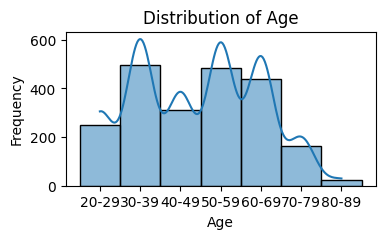

In [132]:
bin_value = df['age_class'].nunique()

# Create a histogram of the 'tenure' column
plt.figure(figsize=(4, 2))
sns.histplot(data=df, x='age_class', bins=bin_value,kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [133]:
df.age_class.value_counts()


30-39    496
50-59    483
60-69    437
40-49    311
20-29    249
70-79    163
80-89     23
Name: age_class, dtype: int64

In [134]:
age_class = { '20-29' : 0,
              '30-39' : 1,
              '40-49' : 2,
              '50-59' : 3,
              '60-69' : 4,
              '70-79' : 5,
              '80-89' : 6,
            }

**employment**

In [135]:
df.employment.value_counts() #label encoding (unemployed=0, others=1, self-employed=2, Private sector retiree=3, gov retiree=4, employed=5)

Employed                  1023
Unemployed                 600
Self-employed              316
Government retiree         107
Private sector retiree      86
Others                      30
Name: employment, dtype: int64

In [136]:
employment = {'Unemployed':0,
              'Others':1,
              'Self-employed':2,
              'Private sector retiree':3,
              'Government retiree':4,
              'Employed':5
              }

**salary**

In [137]:
df.salary.value_counts() #label encoding for B=0 , M= 1

Less than 1K    755
1K to 2K        424
2K to 3K        350
3K to 4K        203
4K to 5K        125
5K to 6K        122
10K or more      93
7K to 8K         53
9K to 10K        19
8K to 9K         18
Name: salary, dtype: int64

Salary less than 5k is 0(B) ,while salary more than 5k is 1(M)

In [138]:
salary = {'Less than 1K': 0,
          '1K to 2K': 0,
          '2K to 3K': 0,
          '3K to 4K': 0,
          '4K to 5K': 0,
          '5K to 6K': 1,
          '10K or more': 1,
          '7K to 8K': 1,
          '9K to 10K': 1,
          '8K to 9K': 1
         }

**house_type**

In [139]:
df.house_type.value_counts() #one hot encoding combine based on own , rental, parent

Parent's house                           629
Own house - one storey terrace           359
Own house - kampung / wooden house       330
Own house - double storey terrace        201
Rental house - single storey             148
Rental house - flat                      125
Own house - flat                          87
Rental house - kampung / wooden house     72
Own house - bungalows                     70
Own house - condominiums                  56
Rental house - double storey terrace      41
Rental house - condominiums               36
Rental house - bungalows                   8
Name: house_type, dtype: int64

Group together categories into larger group ,own ,rental and parent

In [140]:
house_type = {'Parent\'s house' : 'Parent',
              'Own house - one storey terrace' : 'Own',
              'Own house - kampung / wooden house' : 'Own',
              'Own house - double storey terrace' : 'Own',
              'Own house - flat' : 'Own',
              'Own house - bungalows' : 'Own',
              'Own house - condominiums' : 'Own',
              'Rental house - single storey' : 'Rental',
              'Rental house - flat' : 'Rental',
              'Rental house - kampung / wooden house' : 'Rental',
              'Rental house - double storey terrace' : 'Rental',
              'Rental house - condominiums' : 'Rental',
              'Rental house - bungalows' : 'Rental'
              }

**vehicle**

In [141]:
df.vehicle.value_counts() ##label encoding combine based on local vs import ,no vehicle

Local brand car            882
Did not own any vehicle    491
Asia brand car             391
Motorcycle                 351
Europe brand car            47
Name: vehicle, dtype: int64

Combine into larger group: local,Import,motorcycle,no_vehicle

In [142]:
vehicle = {'Local brand car' : 'Local',
           'Asia brand car' : 'Import',
           'Europe brand car' : 'Import',
           'Motorcycle' : 'Motorcycle',
           'Did not own any vehicle' : 'no_vehicle'
          }

**transport_use**

In [143]:
df.transport_use.value_counts() #label encoding (public=0, both=1, own=2)

Own transport                       2011
Public transport                     122
Own transport & Public transport      29
Name: transport_use, dtype: int64

In [144]:
transport_use = {'Public transport' : 0,
                 'Own transport & Public transport' : 1,
                 'Own transport' : 2
                }

Make label encode: Public=0, Both=1, Own=2

**married**

In [145]:
df.married.value_counts() #label encoding (No=0,divorce=1, yes=2)

Yes         1567
No           477
Divorcee     118
Name: married, dtype: int64

In [146]:
married = {'Yes' : 2,
           'No' : 0,
           'Divorcee' : 1
          }

Make label encode: Public=0, Both=1, Own=2

**education**


In [147]:


df.education.value_counts() #label encoding (high school=0,certificate=1,diploma=2, bd=3)

High School          1359
Bachelor's Degree     434
Diploma               270
Certificates           99
Name: education, dtype: int64

In [148]:
education = {'High School' : 0,
             'Bachelor\'s Degree' : 3,
             'Diploma' : 2,
             'Certificates' : 1
            }

Make label encode: High School=0, Certificates=1, Diploma=2, Bachelor's Degree=3

**gender**

In [149]:
df.gender.value_counts() #one hot encoding

F    1090
M    1072
Name: gender, dtype: int64

**race**

In [150]:
df.race.value_counts() #one hot encoding

Kree       972
Sapiens    661
Skrull     462
Others      67
Name: race, dtype: int64

3.22 Approach for encoding columns:
1. Label Encoding:
- employment
- salary
- transport_use
- married
- education

2. One-hot Encoding
- house_type
- gender
- race
- vehicle


3.23 Before we do encoding ,create backup first

In [151]:
df_backup = df.copy()

In [152]:
# Label encoding features
label_encoding_features = ['employment',
                            'salary',
                            'transport_use',
                            'married',
                            'education',
                            'age_class']

# One Hot features
one_hot_features = ['house_type',
                    'gender',
                    'vehicle',
                    'race']

3.24 Label Encoding

In [153]:
label_encoding_mapping = {'employment' : employment,
                          'salary' : salary,
                          'vehicle' : vehicle,
                          'transport_use' : transport_use,
                          'married' : married,
                          'education' : education,
                          'age_class' : age_class
                          }

for feature in label_encoding_mapping:
  df[feature] = [label_encoding_mapping[feature][val] for val in df[feature] if not pd.isna(val)]

3.25 One hot Encoding

Remember to map the house_type ,vehicle first

In [154]:
for key, val in house_type.items():
    df.loc[df['house_type'] == key, 'house_type'] = val

for key, val in house_type.items():
    df.loc[df['vehicle'] == key, 'vehicle'] = val

In [155]:
#check
df['house_type'].value_counts()

Own       1103
Parent     629
Rental     430
Name: house_type, dtype: int64

In [156]:
df['vehicle'].value_counts()

Local         882
no_vehicle    491
Import        438
Motorcycle    351
Name: vehicle, dtype: int64

Now,proceed to one hot encoding

In [157]:
df = pd.get_dummies(df,columns=one_hot_features)

In [158]:
df.head()

,employment,education,married,person_living_in_house,salary,house_rental_fee,house_loan_pmt,transport_use,transport_spending,public_transport_spending,house_utility,food_spending,kids_spending,personal_loan,education_loan,other_loan,investment,age_class,house_type_Own,house_type_Parent,house_type_Rental,gender_F,gender_M,vehicle_Import,vehicle_Local,vehicle_Motorcycle,vehicle_no_vehicle,race_Kree,race_Others,race_Sapiens,race_Skrull
0,5,0,2,3,0,450.0,0.0,2,250.0,0.0,120.0,300.0,160.0,0.0,0.0,200.0,0.0,1,0,0,1,0,1,0,1,0,0,1,0,0,0
1,2,3,2,3,1,0.0,950.0,2,700.0,0.0,350.0,1000.0,500.0,300.0,0.0,0.0,0.0,2,1,0,0,0,1,1,0,0,0,0,0,1,0
2,5,3,2,5,0,0.0,0.0,2,600.0,0.0,300.0,600.0,100.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
3,2,0,2,4,0,0.0,0.0,2,100.0,0.0,200.0,800.0,450.0,0.0,0.0,0.0,0.0,3,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,2,5,0,0.0,0.0,2,0.0,0.0,180.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,0,0,1,0,1,0,0,0,0,0,0,1


In [159]:
df.salary.value_counts()

0    1857
1     305
Name: salary, dtype: int64

## 3.3 Data Distribution (Analytics)

In [160]:
#sns.pairplot(df,hue='salary') this one long to run
#sns.boxplot(y='married',x='salary',data=df)

**Ex. 1 Kids spending Vs Food Spending**

<Axes: xlabel='food_spending', ylabel='kids_spending'>

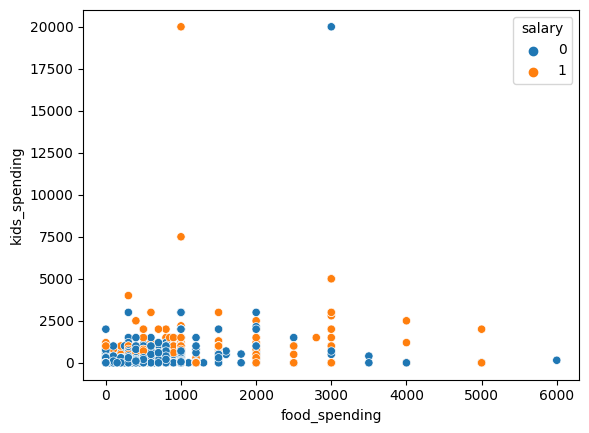

In [161]:
sns.scatterplot(x='food_spending',y='kids_spending',hue='salary',data=df)

As we can see, M(1) tends to spend more in their food and kid if compared to B(0)

**2. Married VS Salary(Boxplot)**

<Axes: xlabel='married', ylabel='count'>

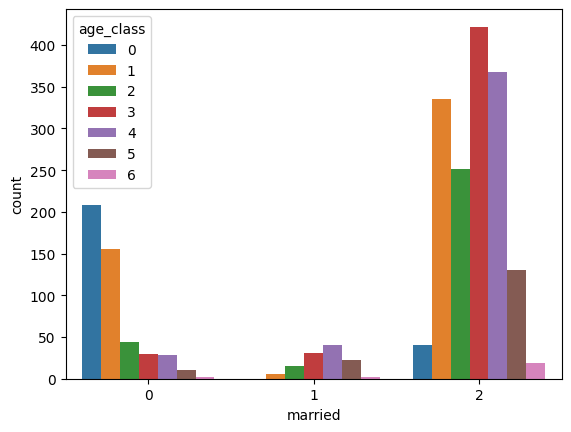

In [162]:
sns.countplot(x='married',hue='age_class',data=df)

Most of our numerical features are right-skewed excdpe `age`. These right-skewed features must be transformed.

3.31 For now, we can export our cleaned data.

In [163]:
df.to_csv('cleaned_data.csv',index=False)

##3.4 Data Transformation

In [164]:
df.columns

Index(['employment', 'education', 'married', 'person_living_in_house',
       'salary', 'house_rental_fee', 'house_loan_pmt', 'transport_use',
       'transport_spending', 'public_transport_spending', 'house_utility',
       'food_spending', 'kids_spending', 'personal_loan', 'education_loan',
       'other_loan', 'investment', 'age_class', 'house_type_Own',
       'house_type_Parent', 'house_type_Rental', 'gender_F', 'gender_M',
       'vehicle_Import', 'vehicle_Local', 'vehicle_Motorcycle',
       'vehicle_no_vehicle', 'race_Kree', 'race_Others', 'race_Sapiens',
       'race_Skrull'],
      dtype='object')

In [165]:
len(df.columns)

31

3.41 Separate data of this two features

In [166]:
right_skew_numerical_transform = ['house_rental_fee',
                                  'house_loan_pmt',
                                  'transport_spending',
                                  'public_transport_spending',
                                  'house_utility',
                                  'food_spending',
                                  'kids_spending',
                                  'personal_loan',
                                  'education_loan',
                                  'other_loan',
                                  'investment']

categorical_features = ['age_class',
                        'house_type_Own',
                        'house_type_Parent',
                        'house_type_Rental',
                        'gender_F',
                        'gender_M',
                        'race_Kree',
                        'race_Others',
                        'race_Sapiens',
                        'race_Skrull',
                        'vehicle_Import',
                        'vehicle_Local',
                        'vehicle_Motorcycle',
                        'vehicle_No_Vehicle',
                        'employment',
                        'transport_use',
                        'married',
                        'education',
                        'age_class']


In [167]:
len(right_skew_numerical_transform)+len(categorical_features)

30

3.42 We will construct a column transformer pipeline each:

1. Right skewed numerical features:

- Log Transform -> RobustScaler() -> StandardScaler()

2. Categorical features:

- Passthrough

Footnote

We do not do for symmetrical because we only have these 2 features

In [168]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import FunctionTransformer

In [169]:
# Create a right skew pipeline to first apply Log Transform ,RobustScaler and then MinMaxScaler
preprocessing_pipeline1 = Pipeline([
    ('log1p_transform', FunctionTransformer(func=np.log1p, validate=False)), #convert from right skew to symmetrical
    ('robust_scaling', RobustScaler()), # removes outliers
    ('standard_scaling', StandardScaler()) #standardization ( create similar scale between features)
])

# Create a column transformer using the pipelines for skew and sym features
#change for the preprosseing pipeline 1
transformer = ColumnTransformer(
    transformers=[
        ('Right_skew_num', preprocessing_pipeline1, right_skew_numerical_transform),

    ],
    remainder="passthrough"
)

In [170]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('Right_skew_num',
                                 Pipeline(steps=[('log1p_transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                 ('robust_scaling',
                                                  RobustScaler()),
                                                 ('standard_scaling',
                                                  StandardScaler())]),
                                 ['house_rental_fee', 'house_loan_pmt',
                                  'transport_spending',
                                  'public_transport_spending', 'house_utility',
                                  'food_spending', 'kids_spending',
                                  'personal_loan', 'education_loan',
                                  'other_loan', 'investment'])])

In [171]:
df.to_csv('cleaned_dataTransformed.csv',index=False)

# 4. Model Development

Footnote
1. Baseline Models
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)

2. Ensemble Models
- Random Forest
- Gradient Boosting
  - Gradient Boosting Classifier
  - Histogram Gradient Boosting Classifier
- XGBoost (eXtreme Gradient Boosting)
- Light Gradient Boosting Machine (LightGBM)

3. Ensemble Methods
- Voting Classifier
- Stacking

4.01 Import Libraries

In [172]:
# Metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold

from sklearn.metrics import roc_auc_score

from sklearn.pipeline import Pipeline, make_pipeline

# Import models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

4.02 Split into dataset into training set and testing set

In [173]:
from sklearn.model_selection import train_test_split

X = df.drop("salary", axis=1) # Features/predictor
Y = df["salary"] # Target

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=1) # 90:10 (Train:Test)

# Check
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (1945, 30) (1945,)
Test set: (217, 30) (217,)


In [174]:
x_train.columns

Index(['employment', 'education', 'married', 'person_living_in_house',
       'house_rental_fee', 'house_loan_pmt', 'transport_use',
       'transport_spending', 'public_transport_spending', 'house_utility',
       'food_spending', 'kids_spending', 'personal_loan', 'education_loan',
       'other_loan', 'investment', 'age_class', 'house_type_Own',
       'house_type_Parent', 'house_type_Rental', 'gender_F', 'gender_M',
       'vehicle_Import', 'vehicle_Local', 'vehicle_Motorcycle',
       'vehicle_no_vehicle', 'race_Kree', 'race_Others', 'race_Sapiens',
       'race_Skrull'],
      dtype='object')

In [175]:
x_train.house_type_Own

1102    1
1797    1
496     0
279     1
1308    0
       ..
993     1
936     1
1131    1
243     0
1095    0
Name: house_type_Own, Length: 1945, dtype: uint8

In [176]:
x_train.head()

,employment,education,married,person_living_in_house,house_rental_fee,house_loan_pmt,transport_use,transport_spending,public_transport_spending,house_utility,food_spending,kids_spending,personal_loan,education_loan,other_loan,investment,age_class,house_type_Own,house_type_Parent,house_type_Rental,gender_F,gender_M,vehicle_Import,vehicle_Local,vehicle_Motorcycle,vehicle_no_vehicle,race_Kree,race_Others,race_Sapiens,race_Skrull
1102,5,2,2,3,0.0,0.0,2,500.0,0.0,500.0,1000.0,1500.0,0.0,0.0,0.0,0.0,1,1,0,0,1,0,1,0,0,0,0,0,1,0
1797,5,3,2,4,0.0,500.0,2,300.0,0.0,400.0,600.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
496,0,0,1,6,0.0,0.0,2,0.0,0.0,200.0,400.0,0.0,0.0,0.0,0.0,0.0,4,0,1,0,1,0,0,0,0,1,0,0,0,1
279,0,0,2,10,0.0,0.0,2,100.0,0.0,100.0,150.0,0.0,0.0,0.0,0.0,0.0,3,1,0,0,0,1,0,0,1,0,1,0,0,0
1308,5,0,0,1,0.0,0.0,2,40.0,0.0,60.0,400.0,120.0,0.0,0.0,0.0,0.0,1,0,1,0,0,1,0,0,1,0,0,1,0,0


4.03 Construct model table



In [177]:
models_table = pd.DataFrame(columns=["Model", # Algorithm
                                     "Model Alias", # Nama pendek
                                     "Detail", # Settings model
                                     "Precision",
                                     "Recall",
                                     "F1-score",
                                     "Cross-Validated AUC"]) # How good the model discriminate between classes

models_table = pd.DataFrame(columns=models_table.columns)
models_table.head()

,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated AUC


In [178]:
def train_evaluate(model, x_train, y_train, x_test, y_test, X, Y):
    # Train the model
    model.fit(x_train, y_train) # Model will try to learn

    # Predict probabilities and labels
    prediction_prob = model.predict_proba(x_test) # Probability of a class
    prediction = model.predict(x_test) # Exact prediction

    # Calculate accuracy, precision, recall, F1-score, log loss
    test_accuracy = model.score(x_test, y_test)
    train_accuracy = model.score(x_train, y_train)
    precision = precision_score(y_test, prediction)
    recall = recall_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)

    # Cross Validation
    # Stratified sampling instead of random sampling for equal proportion
    stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Perform cross-validation on the test data and calculate mean accuracy and log loss
    results = cross_validate(model,
                              X,
                              Y,
                              cv=stratified_kf,
                              scoring='roc_auc')

    # Extract the scores
    auc_scores = results['test_score']

    # Calculate the means for each cross validated evaluation metrics
    mean_auc_scores = np.mean(auc_scores)

    # Print the evaluation metrics
    print("---------Debugging---------")
    print(f"AUC: {auc_scores}")
    print("*********Check Overfitting/Underfitting*********")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print("*********Evaluating Metric*********")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC: {mean_auc_scores:.4f}")

    return precision, recall, f1, mean_auc_scores

In [179]:
def model_tab(models_table, model_name, model_alias, model_detail, metrics):
    new_row = {
        "Model": model_name,
        "Model Alias": model_alias,
        "Detail": model_detail,
        "Precision": metrics[0],
        "Recall": metrics[1],
        "F1-score": metrics[2],
        "Cross-Validated AUC": metrics[3]
    }

    row_add = pd.DataFrame([new_row])

    models_table = pd.concat([models_table, row_add], ignore_index=True)

    return models_table

##4.1. Logistic Regression


In [180]:
lor1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', LogisticRegression())
])

metrics = train_evaluate(lor1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

model_name = "Logistic Regression"
model_alias = "lor1"
model_detail = "Default, Scaled"

models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
AUC: [0.91106998 0.89533756 0.90579294 0.90093235 0.92505855]
*********Check Overfitting/Underfitting*********
Train Accuracy: 0.9090
Test Accuracy: 0.9032
*********Evaluating Metric*********
Precision: 0.6667
Recall: 0.5000
F1-score: 0.5714
ROC: 0.9076


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated AUC
0,Logistic Regression,lor1,"Default, Scaled",0.666667,0.5,0.571429,0.907638


###4.2.Random Forest Classifier

In [181]:
rf1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', RandomForestClassifier())
])

metrics = train_evaluate(rf1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

model_name = "Random Forest"
model_alias = "rf1"
model_detail = "Default, Scaled"

models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
AUC: [0.93722457 0.91966332 0.92331315 0.94474394 0.94275551]
*********Check Overfitting/Underfitting*********
Train Accuracy: 1.0000
Test Accuracy: 0.9171
*********Evaluating Metric*********
Precision: 0.7273
Recall: 0.5714
F1-score: 0.6400
ROC: 0.9335


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated AUC
0,Logistic Regression,lor1,"Default, Scaled",0.666667,0.500000,0.571429,0.907638
1,Random Forest,rf1,"Default, Scaled",0.727273,0.571429,0.640000,0.933540


###4.3 Support Vector Classifier (SVC)

In [182]:
%%time
svc1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', SVC(probability=True))
])

metrics = train_evaluate(svc1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

model_name = "Support Vector"
model_alias = "svc1"
model_detail = "Default, Scaled"

models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
AUC: [0.89912745 0.87317116 0.90711855 0.91220008 0.93248199]
*********Check Overfitting/Underfitting*********
Train Accuracy: 0.9239
Test Accuracy: 0.8940
*********Evaluating Metric*********
Precision: 0.6471
Recall: 0.3929
F1-score: 0.4889
ROC: 0.9048
CPU times: user 2.36 s, sys: 0 ns, total: 2.36 s
Wall time: 2.36 s


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated AUC
0,Logistic Regression,lor1,"Default, Scaled",0.666667,0.500000,0.571429,0.907638
1,Random Forest,rf1,"Default, Scaled",0.727273,0.571429,0.640000,0.933540
2,Support Vector,svc1,"Default, Scaled",0.647059,0.392857,0.488889,0.904820


###4.4. XG Boost Classifier

In [183]:
%%time
xgb1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', XGBClassifier())
])

metrics = train_evaluate(xgb1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

model_name = "XGB Classifier"
model_alias = "xgb1"
model_detail = "Default, Scaled"

models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
AUC: [0.90983607 0.92808038 0.89403915 0.92616323 0.93698909]
*********Check Overfitting/Underfitting*********
Train Accuracy: 1.0000
Test Accuracy: 0.9032
*********Evaluating Metric*********
Precision: 0.6400
Recall: 0.5714
F1-score: 0.6038
ROC: 0.9190
CPU times: user 1.29 s, sys: 8.77 ms, total: 1.3 s
Wall time: 706 ms


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated AUC
0,Logistic Regression,lor1,"Default, Scaled",0.666667,0.500000,0.571429,0.907638
1,Random Forest,rf1,"Default, Scaled",0.727273,0.571429,0.640000,0.933540
2,Support Vector,svc1,"Default, Scaled",0.647059,0.392857,0.488889,0.904820
3,XGB Classifier,xgb1,"Default, Scaled",0.640000,0.571429,0.603774,0.919022


###4.5. LGBMClassifier

In [184]:
%%time
lgbm1 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', LGBMClassifier())
])

metrics = train_evaluate(lgbm1,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

model_name = "LGBM Classifier"
model_alias = "lgbm1"
model_detail = "Default, Scaled"

models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

[LightGBM] [Info] Number of positive: 277, number of negative: 1668
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 1945, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.142416 -> initscore=-1.795363
[LightGBM] [Info] Start training from score -1.795363
[LightGBM] [Info] Number of positive: 244, number of negative: 1485
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 375
[LightGBM] [Info] Number of data points in the train set: 1729, number of used features: 30
[LightGBM] [Info] [binary:Bo

,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated AUC
0,Logistic Regression,lor1,"Default, Scaled",0.666667,0.500000,0.571429,0.907638
1,Random Forest,rf1,"Default, Scaled",0.727273,0.571429,0.640000,0.933540
2,Support Vector,svc1,"Default, Scaled",0.647059,0.392857,0.488889,0.904820
3,XGB Classifier,xgb1,"Default, Scaled",0.640000,0.571429,0.603774,0.919022
4,LGBM Classifier,lgbm1,"Default, Scaled",0.640000,0.571429,0.603774,0.926969


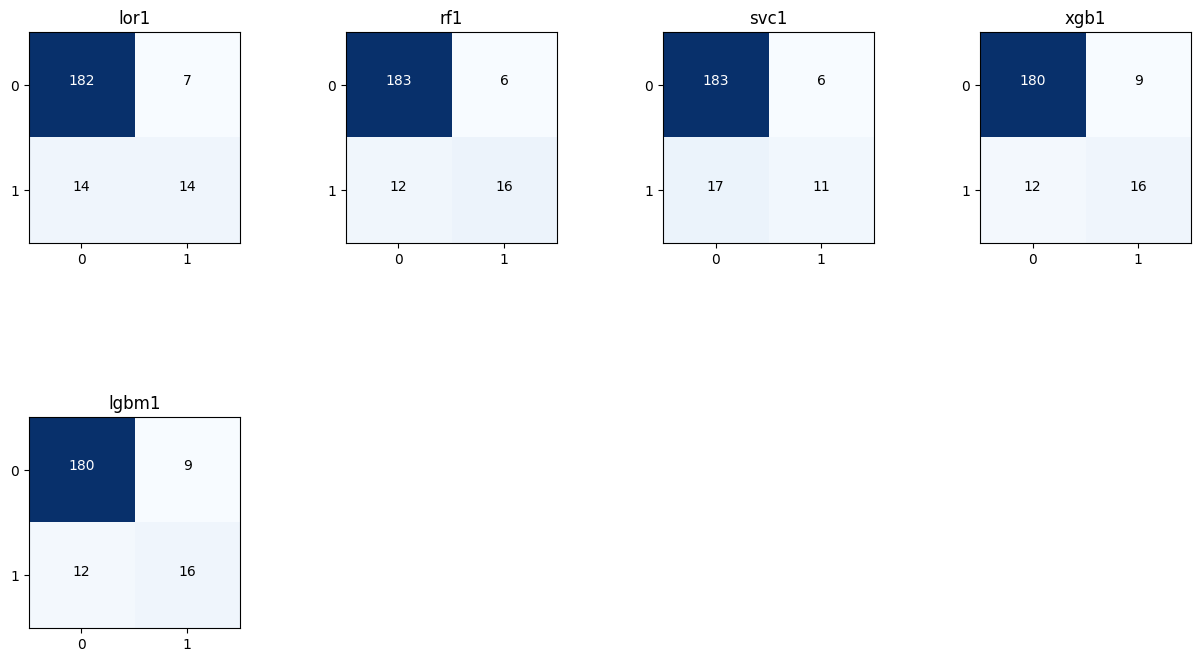

In [185]:
import itertools
from sklearn.metrics import confusion_matrix
models_list = [lor1,rf1, svc1, xgb1,lgbm1]
models_list_title = ['lor1', 'rf1','svc1', 'xgb1','lgbm1']

# Define the number of rows and columns for the subplots
n_rows = 2
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
plt.subplots_adjust(wspace=0.5, hspace=0)

for i, model in enumerate(models_list):
    # Predict using the model
    predict = model.predict(x_test)

    # Compute the confusion matrix
    cnf_matrix = confusion_matrix(y_test, predict, labels=[0, 1])

    # Determine the subplot location based on the current index
    row_index = i // n_cols
    col_index = i % n_cols

    # Plot the confusion matrix in the appropriate subplot
    axes[row_index, col_index].imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    axes[row_index, col_index].set_title(models_list_title[i])
    tick_marks = np.arange(2)
    axes[row_index, col_index].set_xticks(tick_marks)
    axes[row_index, col_index].set_yticks(tick_marks)
    #axes[row_index, col_index].set_xticklabels(['Not Pulsar', 'Pulsar'])
    #axes[row_index, col_index].set_yticklabels(['Not Pulsar', 'Pulsar'])
    thresh = cnf_matrix.max() / 2.0
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        axes[row_index, col_index].text(j, i, format(cnf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

# Remove any remaining empty subplots
for i in range(len(models_list), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

# Show the subplots
plt.show()

# 5. Hyperparameter Tuning

5.1 Random Forest Tuning

In [186]:
%%time
# Define the hyperparameter grid for RandomForestClassifier
rf_param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9]
}

model_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rf_param_grid,
    scoring='roc_auc',  # Use AUC as the scoring metric
    cv=5,
    n_iter=200,
    n_jobs=-1,
    verbose=3,
)

rf2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', model_rf)
])

rf2.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
CPU times: user 3.01 s, sys: 356 ms, total: 3.36 s
Wall time: 1min 40s


Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Right_skew_num',
                                                  Pipeline(steps=[('log1p_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('robust_scaling',
                                                                   RobustScaler()),
                                                                  ('standard_scaling',
                                                                   StandardScaler())]),
                                                  ['house_rental_fee',
                                                   'house_loan_pmt',
                                                   'transport_spending',
                                                   'public_transport_spending',
                                                   'h...
                                                   'food_spending',
                                                   'kids_spending',
                                                   'personal_loan',
                                                   'education_loan',
                                                   'other_loan',
                                                   'investment'])])),
                ('Model',
                 RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                                    n_iter=200, n_jobs=-1,
                                    param_distributions={'max_depth': [3, 6, 9],
                                                         'max_features': ['sqrt',
                                                                          'log2',
                                                                          None],
                                                         'max_leaf_nodes': [3,
                                                                            6,
                                                                            9],
                                                         'n_estimators': [25,
                                                                          50,
                                                                          100,
                                                                          150]},
                                    scoring='roc_auc', verbose=3))])

5.11 XGBC Tuning

In [187]:
%%time
# Define the hyperparameter grid for XGBClassifier
xgb_param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting stages
    'learning_rate': [0.001, 0.01, 0.1],  # Step size shrinkage used in update
    'max_depth': [3, 7, 9],  # Maximum depth of trees
    'min_child_weight': [1, 2, 4],  # Minimum sum of instance weight needed in a child
    'gamma': [0, 0.1, 0.2, 0.3],  # Minimum loss reduction required to make a further partition on a leaf node
    'subsample': [0.5, 0.7, 1.0],  # Fraction of samples used for fitting the trees
    'reg_alpha': [0.0, 0.1, 0.2, 0.3],  # L1 regularization term on weights
    'reg_lambda': [0.0, 0.1, 0.2, 0.3]  # L2 regularization term on weights
}

model_xgb = RandomizedSearchCV(
    estimator=XGBClassifier(),
    param_distributions=rf_param_grid,
    scoring='roc_auc',  # Use AUC as the scoring metric
    cv=5,
    n_iter=200,
    n_jobs=-1,
    verbose=3,
)

xgb2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', model_xgb)
])

xgb2.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
CPU times: user 1.27 s, sys: 84.9 ms, total: 1.36 s
Wall time: 29.8 s


Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Right_skew_num',
                                                  Pipeline(steps=[('log1p_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('robust_scaling',
                                                                   RobustScaler()),
                                                                  ('standard_scaling',
                                                                   StandardScaler())]),
                                                  ['house_rental_fee',
                                                   'house_loan_pmt',
                                                   'transport_spending',
                                                   'public_transport_spending',
                                                   'h...
                                                            max_leaves=None,
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None,
                                                            random_state=None, ...),
                                    n_iter=200, n_jobs=-1,
                                    param_distributions={'max_depth': [3, 6, 9],
                                                         'max_features': ['sqrt',
                                                                          'log2',
                                                                          None],
                                                         'max_leaf_nodes': [3,
                                                                            6,
                                                                            9],
                                                         'n_estimators': [25,
                                                                          50,
                                                                          100,
                                                                          150]},
                                    scoring='roc_auc', verbose=3))])

## 5.2 Retrain with Tuned Hyperparameters

5.21 Random Forest Retrain

In [188]:
best_param_rf = model_rf.best_params_

These are the best parameters obtained with RadomizedSearchCV

In [189]:
best_param_rf

{'n_estimators': 100,
 'max_leaf_nodes': 9,
 'max_features': 'sqrt',
 'max_depth': 6}

In [190]:

%%time
# Create a model pipeline
rf2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', RandomForestClassifier(**best_param_rf))
                ])

# Function to train and evaluate the model
metrics = train_evaluate(rf2,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "Random Forest"
model_alias = "rf2"
model_detail = "Tuned, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
AUC: [0.92918209 0.90829367 0.92050727 0.94286598 0.92996332]
*********Check Overfitting/Underfitting*********
Train Accuracy: 0.9090
Test Accuracy: 0.8986
*********Evaluating Metric*********
Precision: 0.8000
Recall: 0.2857
F1-score: 0.4211
ROC: 0.9262
CPU times: user 1.42 s, sys: 6.02 ms, total: 1.43 s
Wall time: 1.43 s


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated AUC
0,Logistic Regression,lor1,"Default, Scaled",0.666667,0.500000,0.571429,0.907638
1,Random Forest,rf1,"Default, Scaled",0.727273,0.571429,0.640000,0.933540
2,Support Vector,svc1,"Default, Scaled",0.647059,0.392857,0.488889,0.904820
3,XGB Classifier,xgb1,"Default, Scaled",0.640000,0.571429,0.603774,0.919022
4,LGBM Classifier,lgbm1,"Default, Scaled",0.640000,0.571429,0.603774,0.926969
5,Random Forest,rf2,"Tuned, Scaled",0.800000,0.285714,0.421053,0.926162


5.22 XGBC Retrain

In [191]:
best_param_xgb = model_xgb.best_params_

In [192]:
model_xgb.best_params_

{'n_estimators': 25,
 'max_leaf_nodes': 3,
 'max_features': 'sqrt',
 'max_depth': 3}

In [193]:
%%time
# Create a model pipeline
xgb2 = Pipeline([
    ('ColumnTransformer', transformer),
    ('Model', XGBClassifier(**best_param_xgb))
                ])

# Function to train and evaluate the model
metrics = train_evaluate(xgb2,
                         x_train,
                         y_train,
                         x_test,
                         y_test,
                         X,
                         Y)
metrics

# Note for Table
model_name = "XGB Classifier"
model_alias = "xgb2"
model_detail = "Tuned, Scaled"
# Function to store the evaluation metrics as table
models_table = model_tab(models_table,
                         model_name,
                         model_alias,
                         model_detail,
                         metrics)
models_table

---------Debugging---------
AUC: [0.92808038 0.92475322 0.91873978 0.93354249 0.94337413]
*********Check Overfitting/Underfitting*********
Train Accuracy: 0.9440
Test Accuracy: 0.9078
*********Evaluating Metric*********
Precision: 0.6538
Recall: 0.6071
F1-score: 0.6296
ROC: 0.9297
CPU times: user 554 ms, sys: 8.25 ms, total: 562 ms
Wall time: 326 ms


,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated AUC
0,Logistic Regression,lor1,"Default, Scaled",0.666667,0.500000,0.571429,0.907638
1,Random Forest,rf1,"Default, Scaled",0.727273,0.571429,0.640000,0.933540
2,Support Vector,svc1,"Default, Scaled",0.647059,0.392857,0.488889,0.904820
3,XGB Classifier,xgb1,"Default, Scaled",0.640000,0.571429,0.603774,0.919022
4,LGBM Classifier,lgbm1,"Default, Scaled",0.640000,0.571429,0.603774,0.926969
5,Random Forest,rf2,"Tuned, Scaled",0.800000,0.285714,0.421053,0.926162
6,XGB Classifier,xgb2,"Tuned, Scaled",0.653846,0.607143,0.629630,0.929698


# 6. Model Evaluation

##6.1AUC-ROC Curve

The AUC-ROC curve (Area Under the Receiver Operating Characteristic curve) is a graphical representation used to assess and compare the performance of classification models, such as binary classifiers.

1. Receiver Operating Characteristic (ROC) Curve: The ROC curve is a graph that displays the performance of a classification model across various classification thresholds. It plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity) at different threshold values. The curve shows how well the model distinguishes between the positive and negative classes.

2. Area Under the Curve (AUC): AUC measures the overall performance of a model. It represents the area under the ROC curve. A perfect model has an AUC of 1, while a random model has an AUC of 0.5. The closer the AUC is to 1, the better the model's ability to discriminate between the two classes.

In [194]:
models_list = [lor1, svc1, rf1, xgb1, rf2, xgb2]
models_list_title = ['lor1', 'svc1',  'rf1', 'xgb', 'rf2', 'xgb2']

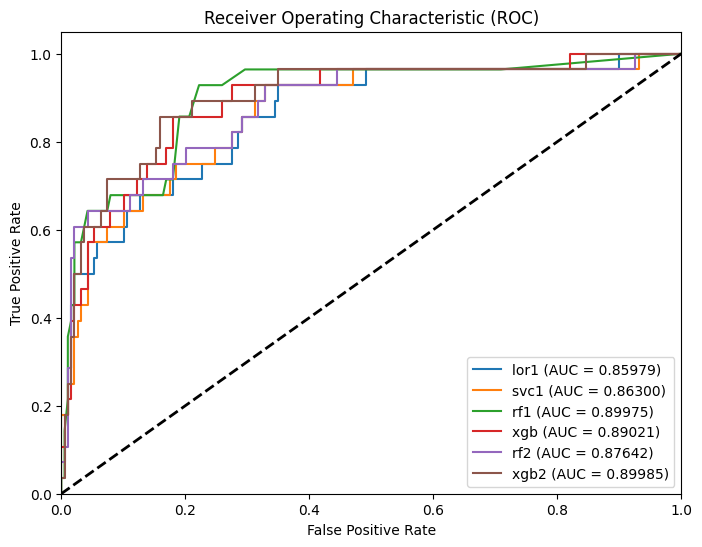

In [195]:
from sklearn.metrics import roc_curve, auc

# Create an empty list to store AUC values
auc_values = []

# Define classes and labels here
# For example: classes = [0, 1]

# Create a figure and axis for the ROC plot
plt.figure(figsize=(8, 6))

# Iterate through the models
for i, model in enumerate(models_list):
    # Get model predictions
    y_score = model.predict_proba(x_test)[:, 1]  # Adjust if necessary

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_score)

    # Compute AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve with model name from models_list_title
    plt.plot(fpr, tpr, label=f'{models_list_title[i]} (AUC = {roc_auc:.5f})')

    # Store AUC value
    auc_values.append(roc_auc)

# Set plot properties
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [196]:
# Print AUC values
for i, auc_val in enumerate(auc_values):
    print(f'{models_list_title[i]}: AUC = {auc_val:.5f}')

lor1: AUC = 0.85979
svc1: AUC = 0.86300
rf1: AUC = 0.89975
xgb: AUC = 0.89021
rf2: AUC = 0.87642
xgb2: AUC = 0.89985


The AUC values serve as a measure of how well each model can classify data. Models with higher AUC values excel in distinguishing between different classes. In our case, all of our models demonstrate strong AUC values, signifying their effectiveness in distinguishing between the classes.

##6.2 Confusion Matrix

A confusion matrix is a fundamental tool for evaluating the performance of a classification model. It helps us understand how well our model is making predictions by comparing the actual and predicted values.

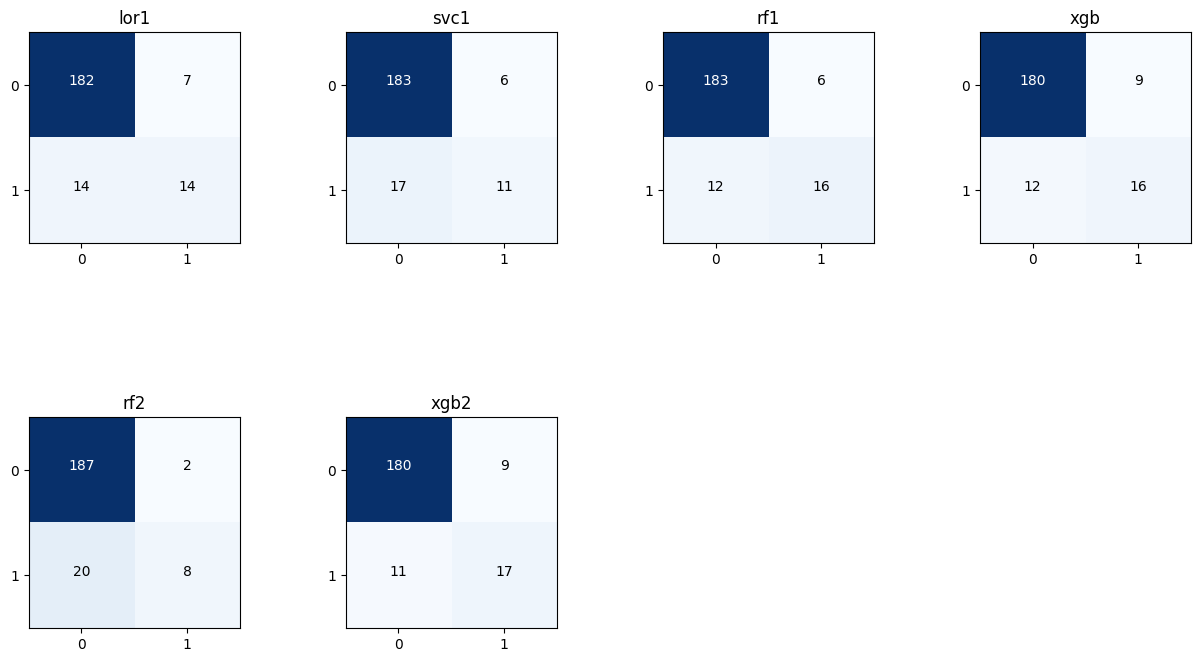

In [197]:
import itertools
from sklearn.metrics import confusion_matrix

# Define the number of rows and columns for the subplots
n_rows = 2
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
plt.subplots_adjust(wspace=0.5, hspace=0)

for i, model in enumerate(models_list):
    # Predict using the model
    predict = model.predict(x_test)

    # Compute the confusion matrix
    cnf_matrix = confusion_matrix(y_test, predict, labels=[0, 1])

    # Determine the subplot location based on the current index
    row_index = i // n_cols
    col_index = i % n_cols

    # Plot the confusion matrix in the appropriate subplot
    axes[row_index, col_index].imshow(cnf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    axes[row_index, col_index].set_title(models_list_title[i])
    tick_marks = np.arange(2)
    axes[row_index, col_index].set_xticks(tick_marks)
    axes[row_index, col_index].set_yticks(tick_marks)
    #axes[row_index, col_index].set_xticklabels(['Not Pulsar', 'Pulsar'])
    #axes[row_index, col_index].set_yticklabels(['Not Pulsar', 'Pulsar'])
    thresh = cnf_matrix.max() / 2.0
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        axes[row_index, col_index].text(j, i, format(cnf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

# Remove any remaining empty subplots
for i in range(len(models_list), n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

# Show the subplots
plt.show()

Class 0 = B
Class 1 = M

If we want to classify the population based on their salary, we prioritize AUC because we want to create a model that can differentiate between classes B and M.

In [198]:
models_table

,Model,Model Alias,Detail,Precision,Recall,F1-score,Cross-Validated AUC
0,Logistic Regression,lor1,"Default, Scaled",0.666667,0.500000,0.571429,0.907638
1,Random Forest,rf1,"Default, Scaled",0.727273,0.571429,0.640000,0.933540
2,Support Vector,svc1,"Default, Scaled",0.647059,0.392857,0.488889,0.904820
3,XGB Classifier,xgb1,"Default, Scaled",0.640000,0.571429,0.603774,0.919022
4,LGBM Classifier,lgbm1,"Default, Scaled",0.640000,0.571429,0.603774,0.926969
5,Random Forest,rf2,"Tuned, Scaled",0.800000,0.285714,0.421053,0.926162
6,XGB Classifier,xgb2,"Tuned, Scaled",0.653846,0.607143,0.629630,0.929698


In [199]:
xgb2

Pipeline(steps=[('ColumnTransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Right_skew_num',
                                                  Pipeline(steps=[('log1p_transform',
                                                                   FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                  ('robust_scaling',
                                                                   RobustScaler()),
                                                                  ('standard_scaling',
                                                                   StandardScaler())]),
                                                  ['house_rental_fee',
                                                   'house_loan_pmt',
                                                   'transport_spending',
                                                   'public_transport_spending',
                                                   'h...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_features='sqrt',
                               max_leaf_nodes=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=25, n_jobs=None, ...))])

Question to be asked
1. Find the model with the highest AUC and F1 Score
2. Mention the AUC Value and F1 Score
3. Is hyperparameter tuning effective?

Firstly,to know whether the model is good or not, we put AUC as the number one consideration and we look at its  Train accuracy whether overfitting or not ,if not we have to consider highest F1 score after the model being tuned.

Now,we know that model that has the highest AUC obtained is from RF1,AUC = 0.930600, but RF1 has the train accuracy equal to 1.0000 which is overfitting. So , we come up with an idea to take XGB2 , because it has the highest F1 Score and AUC after rf1, thus this will be our best selected model.In this case , we consider tuning for this model and we got F1 Score = 0.629630	AUC = 0.929698

#7. Summary

Model that is selected to be the best is xgb2 with F1 Score = 0.629630	AUC = 0.929698 and train accuracy = 0.9440

##7.1 Export Model

In [204]:
import pickle

# Save the pipeline and model to a file
with open('/content/xgbc_model.pkl', 'wb') as file:
    pickle.dump(xgb2, file)

print("Model Dumped!")

Model Dumped!


##7.2 Load Model

Example of how to load the pickle object

In [205]:
# Load the saved pipeline and model
with open('/content/xgbc_model.pkl', 'rb') as file:
    loaded_pipeline = pickle.load(file)

# Make predictions
predictions_train = loaded_pipeline.predict(x_train)
predictions_test = loaded_pipeline.predict(x_test)

In [206]:
# Calculate accuracy, precision, recall, F1-score, log loss
test_accuracy = model.score(x_test, y_test)
train_accuracy = model.score(x_train, y_train)
precision = precision_score(y_test, predictions_test)
recall = recall_score(y_test, predictions_test)
f1 = f1_score(y_test, predictions_test)

# Cross Validation
# Stratified sampling instead of random sampling for equal proportion
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Perform cross-validation on the test data and calculate mean accuracy and log loss
results = cross_validate(loaded_pipeline,
                          X,
                          Y,
                          cv=stratified_kf,
                          scoring='roc_auc')

# Extract the scores
auc_scores = results['test_score']

# Calculate the means for each cross validated evaluation metrics
mean_auc_scores = np.mean(auc_scores)

# Print the evaluation metrics
print("---------Debugging---------")
print(f"AUC: {auc_scores}")
print("*********Check Overfitting/Underfitting*********")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print("*********Evaluating Metric*********")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Mean AUC: {mean_auc_scores:.4f}")

---------Debugging---------
AUC: [0.92808038 0.92475322 0.91873978 0.93354249 0.94337413]
*********Check Overfitting/Underfitting*********
Train Accuracy: 0.9440
Test Accuracy: 0.9078
*********Evaluating Metric*********
Precision: 0.6538
Recall: 0.6071
F1-score: 0.6296
Mean AUC: 0.9297
